# AIML Classification Assignment 4
## Student Id: 2021AIML064

###  SVM Assignment
#### Problem Statement:

#### The given dataset was collected from the hospital for nearly 2 months of period. We will be using this dataset to predict Chronic Kidney Disease.

Data Set Information:    

age - age     
bp - blood pressure    
sg - specific gravity   
al - albumin   
su - sugar            
rbc - red blood cells   
pc - pus cell        
pcc - pus cell clumps    
ba - bacteria               
bgr - blood glucose random           
bu - blood urea                
sc - serum creatinine             
sod - sodium                       
pot - potassium                
hemo - hemoglobin                 
pcv - packed cell volume           
wc - white blood cell count           
rc - red blood cell count          
htn - hypertension               
dm - diabetes mellitus               
cad - coronary artery disease                
appet - appetite                    
pe - pedal edema                  
ane - anemia                
class - class ( Here ckd means patient have Chronic kidney disease and not  ckd indicated absence of the same)
 

Questions (Total: 9 M)  


  1.  Import the dataset from https://www.kaggle.com/mansoordaku/ckdisease (1 point).

  2. Extract X as all columns except the last column and Y as the last column. (1 point)

  3. Visualize the dataset using any two appropriate graphs. (1 point)

  4. Visualize the correlation between all the variables of the dataset. (1 point)

  5. Do feature scaling (1 point)

  6. Split the data into a training set and testing set. (1 point).

  7. Perform 5-fold cross-validation (1 point).

  8. Train an SVM model for the dataset. (1 point)

  9. Get the classification report and confusion matrix. (1 point)

In [1]:
#!pip install opendatasets to insatll library

In [2]:
# Importing  libraries

import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

%matplotlib inline
import opendatasets as od
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import sklearn libraries for the algo

from sklearn.svm import SVC, LinearSVC


## Question1: Import the dataset from https://www.kaggle.com/mansoordaku/ckdisease (1 point).

In [3]:
od.download("https://www.kaggle.com/mansoordaku/ckdisease")

Skipping, found downloaded files in ".\ckdisease" (use force=True to force download)


In [4]:
kidney_disease = pd.read_csv('kidney_disease.csv')

In [5]:
kidney_disease.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Observations
#### Null values  and data noise is identified  across columns
#### Categorical value are there which need to be converted to numerics before  model design

  ## Question 2. Extract X as all columns except the last column and Y as the last column. (1 point)

In [7]:
X = kidney_disease.drop('classification', axis =1)
Y = kidney_disease['classification']

**Printing meta data of X and Y   
 X is predictor variables/indep variables  
 Y is the dependent variable**

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   rbc     248 non-null    object 
 7   pc      335 non-null    object 
 8   pcc     396 non-null    object 
 9   ba      396 non-null    object 
 10  bgr     356 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     330 non-null    object 
 17  wc      295 non-null    object 
 18  rc      270 non-null    object 
 19  htn     398 non-null    object 
 20  dm      398 non-null    object 
 21  cad     398 non-null    object 
 22  ap

In [9]:
# Check dataset to see what categorical varibles need conversion to numeric

kidney_disease.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
#Before getting into visualization, need to convert some columns into numeric
# These should be numeric based in their description given in the assignment, and on the data observed in the above head
kidney_disease['pcv'] = pd.to_numeric(kidney_disease['pcv'],errors="coerce")
kidney_disease['wc'] = pd.to_numeric(kidney_disease['wc'],errors="coerce")
kidney_disease['rc'] = pd.to_numeric(kidney_disease['rc'],errors="coerce")

In [11]:
kidney_disease.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


 ## Question3. Visualize the dataset using any two appropriate graphs. (1 point)

### Visualize null values in the dataset

<AxesSubplot:>

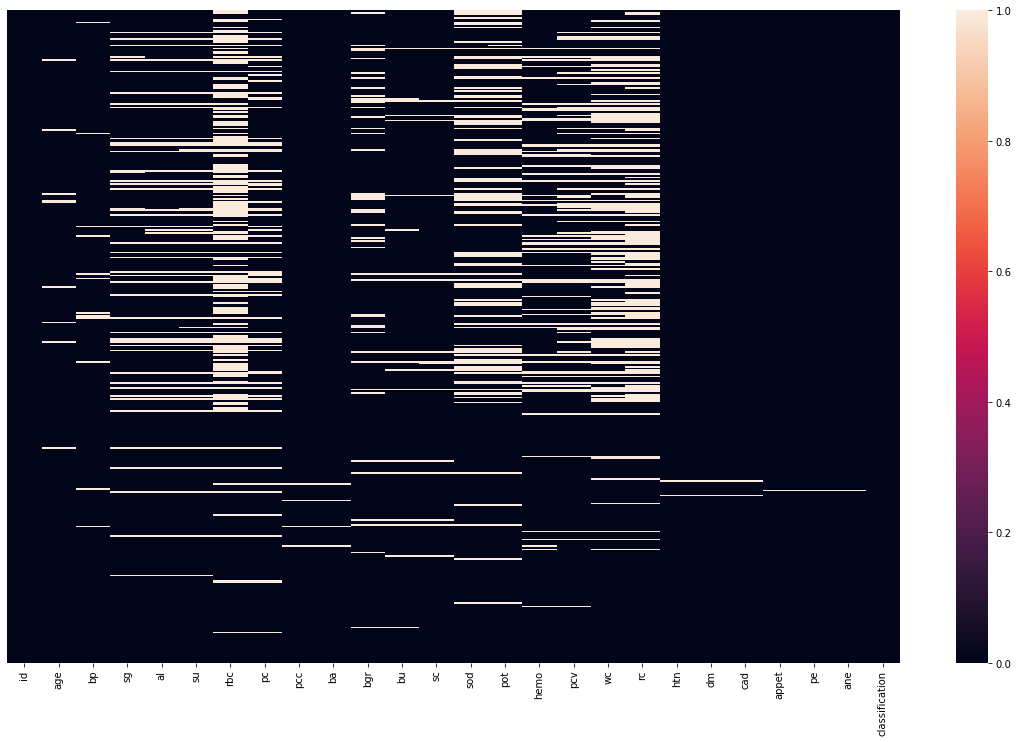

In [12]:
plt.figure(figsize =(20,12))
sns.heatmap(kidney_disease.isnull() ,yticklabels =False, cbar=True)

<AxesSubplot:>

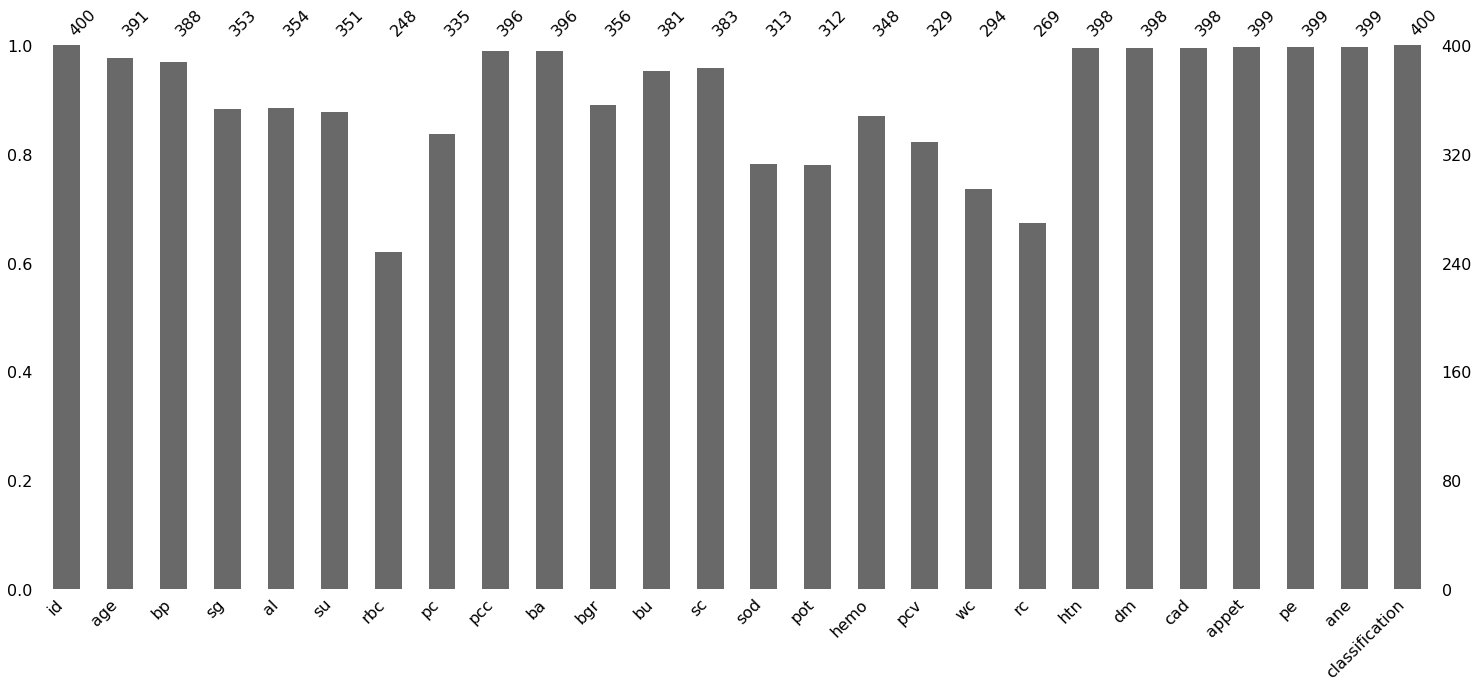

In [13]:
import missingno as msno
msno.bar(kidney_disease)

In [14]:
# Extracting columns with null values

null_col = kidney_disease.columns[kidney_disease.isnull().any()]

In [15]:
## seperating numeric and categorical data

numeric_col = [col for col in kidney_disease.columns if kidney_disease[col].dtype != 'object']
categorical_col = [col for col in kidney_disease.columns if kidney_disease[col].dtype == 'object']

In [16]:
# Numeric columns
numeric_col

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [17]:
# Categorical columns
categorical_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [18]:
# Examining categorical data in details

#####check unique values in the categorical data 

for col in categorical_col:
    print(f"{col} has {kidney_disease[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

cad has ['no' 'yes' '\tno' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [19]:
# From above some data cleaning require in columns like dm, cad, classification

kidney_disease['dm'].replace(to_replace={'\tno' :'no' ,'\tyes' :'yes' , ' yes' :'yes'},inplace=True)
kidney_disease['cad'].replace(to_replace='\tno' , value='no',inplace=True)
kidney_disease['classification'].replace(to_replace="ckd\t" ,value="ckd",inplace=True) 


In [20]:
for col in categorical_col:
    print(f"{col} has {kidney_disease[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' nan] values

cad has ['no' 'yes' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'notckd'] values



### Visualizing numeric columns

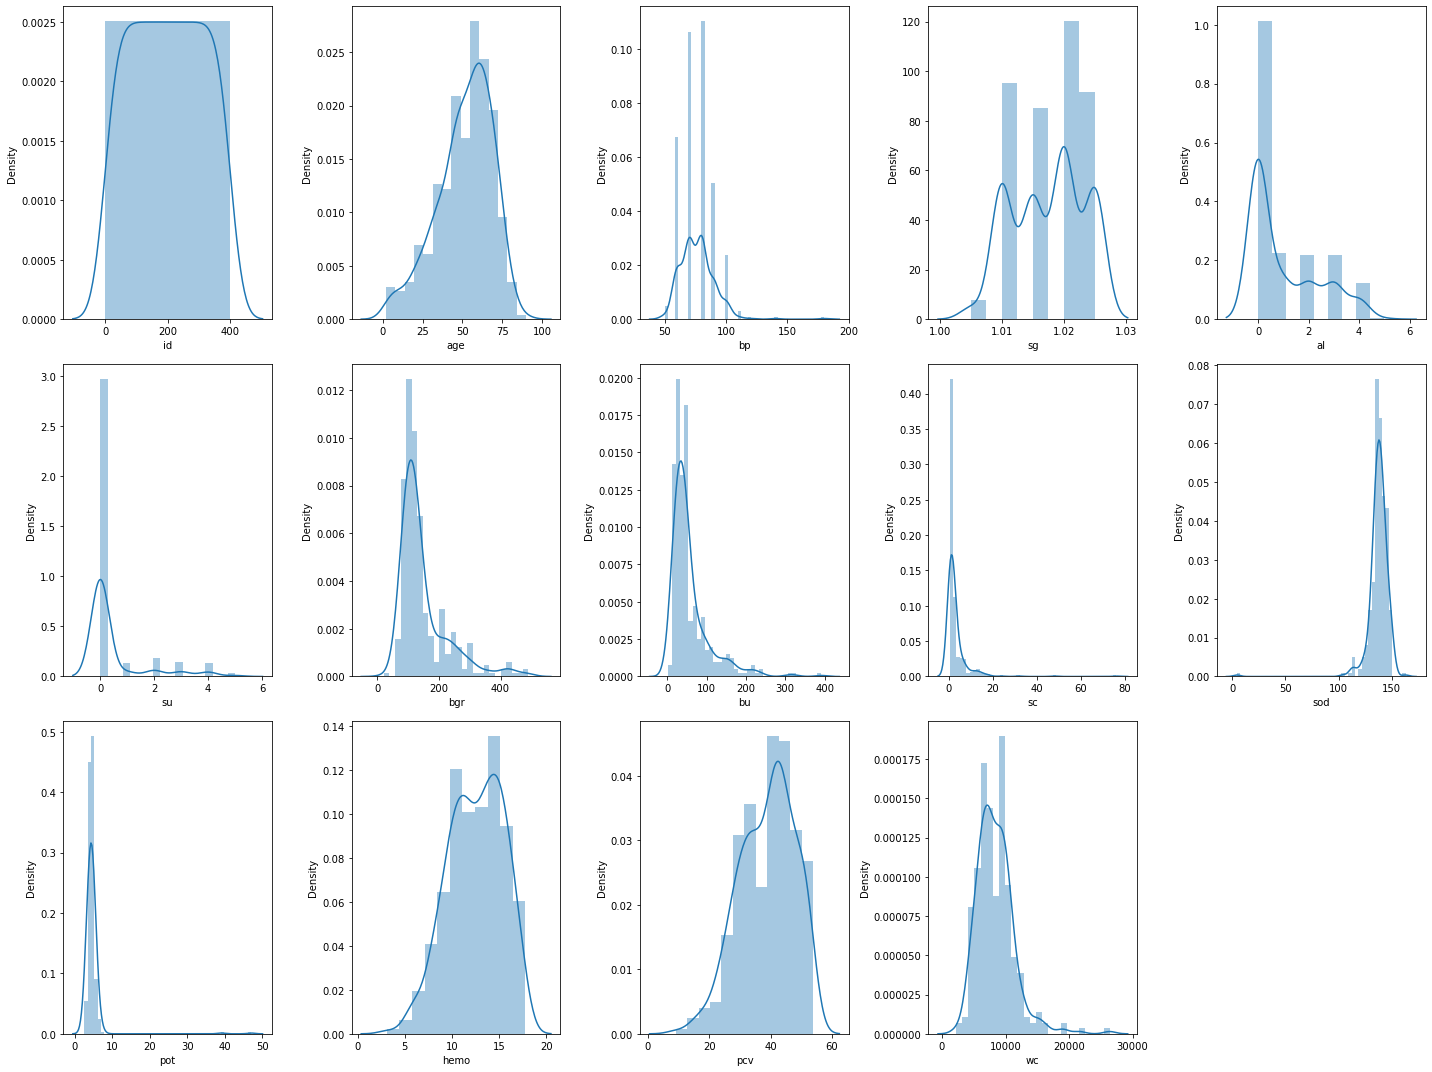

In [21]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric_col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney_disease[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [22]:
#####to handel the skewness in the data 
def handel_outlier(col):
    kidney_disease[col] =np.log1p(kidney_disease[col])

In [23]:
handel_outlier('bu')
handel_outlier('sod')
handel_outlier('pot')
handel_outlier('sc')
handel_outlier('su')

### Check class balance

ckd       250
notckd    150
Name: classification, dtype: int64


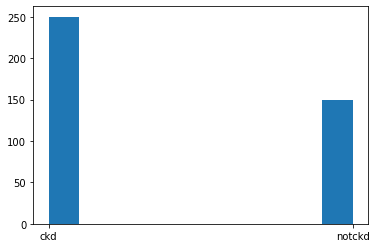

In [24]:
# Check class balance
print(kidney_disease['classification'].value_counts())
plt.hist(kidney_disease['classification'])
plt.show()

### There is no class imbalace problem from above graph

## Question 4. Visualize the correlation between all the variables of the dataset. (1 point)


In [25]:
# We will visualise the correlation between numeric columns above since correlation is appropriate for only numeric columns
# Before looking at correlation, we need to treat the data for null values and outliers

#filling null values, we will use two methods, random sampling for numeric columns and mean/mode sampling for categorical columns
# We define 2 functions to help us do this

def random_value_imputation(feature):
    random_sample = kidney_disease[feature].dropna().sample(kidney_disease[feature].isna().sum())
    random_sample.index = kidney_disease[kidney_disease[feature].isnull()].index
    kidney_disease.loc[kidney_disease[feature].isnull(),feature] =random_sample
    
def impute_mode(feature):
    mode = kidney_disease[feature].mode()[0]
    kidney_disease[feature] = kidney_disease[feature].fillna(mode)

In [26]:
# see null values from numeric columns
kidney_disease[numeric_col].isnull().sum().sort_values(ascending = False)

rc      131
wc      106
pot      88
sod      87
pcv      71
hemo     52
su       49
sg       47
al       46
bgr      44
bu       19
sc       17
bp       12
age       9
id        0
dtype: int64

In [27]:
# Calling the function to fill random null values for numeric columns
for col in numeric_col:
    random_value_imputation(col)

In [28]:
# Checking the null value fix for numeric columns

kidney_disease[numeric_col].isnull().sum()

id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

<AxesSubplot:>

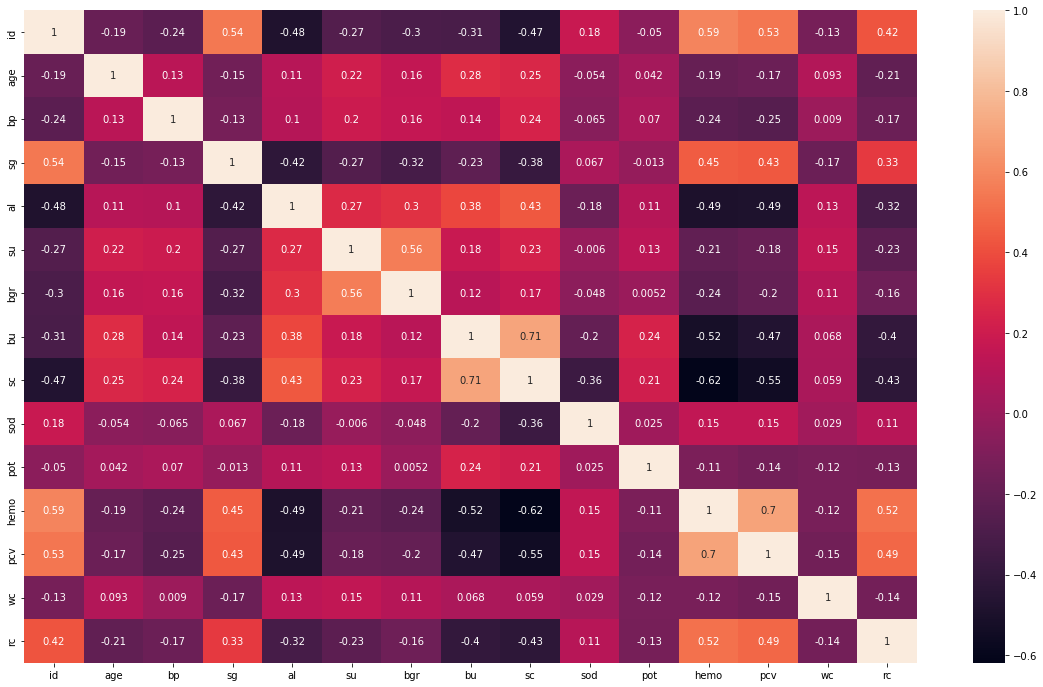

In [29]:
# Checking correlations among numeric variables

# heatmap to find correlation across the independent variables
plt.figure(figsize = (20,12)) 
sns.heatmap(kidney_disease[numeric_col].corr(), annot = True)

In [30]:
#checking null values for categoril columns
kidney_disease[categorical_col].isnull().sum().sort_values(ascending = False)

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [31]:
# Categorical variables are imputed with model value

for col in categorical_col:
    impute_mode(col)

In [32]:
# Checking after imputation the values for categorical columns
kidney_disease[categorical_col].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [33]:
###label encoding for categorical data 
from sklearn.preprocessing  import LabelEncoder
encode = LabelEncoder()

for col in categorical_col:
    kidney_disease[col]=encode.fit_transform(kidney_disease[col])

In [34]:
kidney_disease.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.000000,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.000000,1,1,0,0,...,38.0,6000.0,5.0,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,1.386294,1,1,0,0,...,31.0,7500.0,3.7,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.000000,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.000000,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [35]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int32  
 7   pc              400 non-null    int32  
 8   pcc             400 non-null    int32  
 9   ba              400 non-null    int32  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

#  Question.5 :  Do feature scaling (1 point)

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
kidney_disease[numeric_col] = scaler.fit_transform(kidney_disease[numeric_col].values)

In [39]:
# Prepating to seperate the preictor and indep variables again
### splitting the data
Xf = kidney_disease.drop(columns =['classification', 'id'], axis=1)
Yf = pd.DataFrame(kidney_disease['classification'])

In [40]:
Xf = pd.DataFrame(Xf, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])

In [41]:
Xf.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.207014,0.247353,0.438529,0.000000,-0.437314,1,1,0,0,-0.341372,...,1.017508,0.566531,-0.194424,0.468059,1,1,0,0,0,0
1,-2.611431,-1.935172,0.438529,2.242305,-0.437314,1,1,0,0,0.066503,...,-0.415233,-0.101942,-0.827557,0.271808,0,0,0,0,0,0
2,0.614006,0.247353,-1.315587,0.747435,2.404765,1,1,0,0,3.507950,...,-1.009296,-0.881828,-0.299946,-1.003824,0,1,0,1,0,1
3,-0.207014,-0.480156,-2.192645,2.242305,-0.437314,1,0,1,0,-0.392357,...,-0.450177,-0.770415,-0.581339,-0.807573,1,0,0,1,1,1
4,-0.031081,0.247353,-1.315587,0.747435,-0.437314,1,1,0,0,-0.532564,...,-0.310398,-0.436179,-0.370294,-0.120694,0,0,0,0,0,0


In [42]:
Yf.head()

,classification
0,0
1,0
2,0
3,0
4,0


 # Question.6 : Split the data into a training set and testing set. (1 point).

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test , Y_train, Y_test = train_test_split(Xf, Yf,train_size = 0.7, random_state = 101)

 ## Question 7. Train an SVM model for the dataset. (1 point)

In [45]:
# Prepare parameters for modelling

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, auc

In [46]:
svm = SVC(random_state = 101)

In [47]:
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1,5, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}

In [48]:
svm_grid_search = GridSearchCV(svm, parameters_grid, scoring = 'accuracy')

In [49]:
#fit the data to the grid
svm_grid_search.fit(Xf, Yf)

GridSearchCV(estimator=SVC(random_state=101),
             param_grid={'C': [0.1, 1, 5, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy')

In [50]:
#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

The best parameters are:
 {'C': 1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=1, kernel='linear', random_state=101)


In [51]:
# Create a Decision Tree Classifier with balanced class weight
svm = SVC(C=10, gamma='auto', kernel= 'rbf',random_state=101)
svm.fit(X_train, Y_train)

#Predict Output 
y_pred= svm.predict(X_test)
print (y_pred)

[0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0]


In [52]:
print("Training Accuracy  : {:.3f}".format(svm.score(X_train, Y_train)))
print("Testing Accuracy   : {:.3f}".format(svm.score(X_test, Y_test)))
print('Prediction Accuracy:', round(accuracy_score(Y_test, y_pred), 3))

Training Accuracy  : 1.000
Testing Accuracy   : 0.975
Prediction Accuracy: 0.975


In [53]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

## Question 8. Perform 5-fold cross-validation (1 point).

In [54]:
# importing neessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, StratifiedKFold

In [55]:
# Getting the stratified CV accuracy of model svc
skf = StratifiedKFold(n_splits = 5, shuffle= True, random_state = 101)
cv_svm = cross_val_score(svm, Xf, Yf, cv=skf, scoring='accuracy')
cv_svm
print("Stratified Cross Validation Accuracy for model svm2: %0.2f (+/- %0.2f)" % (cv_svm.mean(), cv_svm.std() * 2))

Stratified Cross Validation Accuracy for model svm2: 0.98 (+/- 0.02)


 ##  Question.9 : Get the classification report and confusion matrix. (1 point)

In [56]:
print('\nClassification Report:      \n' + str(metrics.classification_report(Y_test, y_pred)))


Classification Report:      
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.98      0.97      0.98       120



In [57]:
#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(Y_test, y_pred)))


Confusion Matrix: 
[[79  2]
 [ 1 38]]
